In [1]:
import numpy as np
import clmm
import sys
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit
import glob
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time
cosmo = clmm.Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

In [ ]:
rhom=cosmo.get_rho_m()

In [11]:
h = cosmo['H0']/100

In [2]:
path = '/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_SkySim5000.pkl'

In [5]:
dat = np.load(path, allow_pickle=True)

In [6]:
dat.colnames

['dec',
 'ra',
 'baseDC2/sod_halo_radius',
 'halo_id',
 'halo_mass',
 'baseDC2/sod_halo_mass',
 'redshift']

In [33]:
r200c = dat['baseDC2/sod_halo_radius']/h #Mpc
M200c = dat['baseDC2/sod_halo_mass']/h #Msun
rhoc=cosmo.get_rho_m(dat['redshift'])/cosmo.get_Omega_m(dat['redshift'])
a = 1/(1 + dat['redshift'])

(0.1, 3)

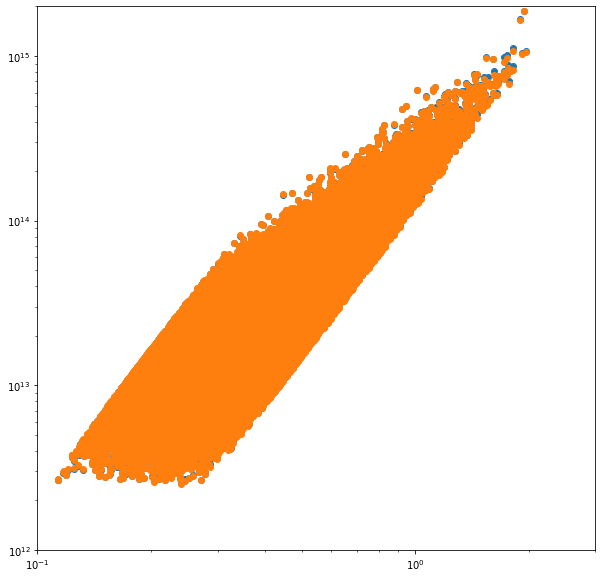

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(r200c*a, M200c)
M200c_remake = (800*np.pi/3)*(r200c*a)**3*rhoc
plt.scatter(r200c*a, M200c_remake )
plt.loglog()
plt.ylim(1e12, 2e15)
plt.xlim(.1, 3)

In [35]:
r200cp = (r200c*a)

(array([1.46973e+05, 2.65682e+05, 4.69520e+04, 8.92300e+03, 2.01600e+03,
        5.67000e+02, 1.37000e+02, 4.70000e+01, 1.90000e+01, 7.00000e+00]),
 array([0.11320884, 0.29802045, 0.48283205, 0.66764366, 0.85245526,
        1.03726687, 1.22207847, 1.40689008, 1.59170168, 1.77651329,
        1.96132489]),
 <a list of 10 Patch objects>)

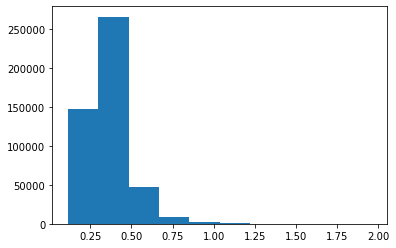

In [38]:
r = np.linspace(0.5, 10, 100)
plt.hist(r200cp[r200cp > 0])

In [41]:
np.mean(r200cp[r200cp > 0])

0.36264772031321924